<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Feature_Selection_10_14_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a href="https://github.com/hussain0048/Machine-Learning/blob/master/Feature%20Selection/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>

# **Table of Content**

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https:">Introduction</a></li>
        <li><a href="#downloading_data">Data Loading</a></li>
        <li><a href="#pre-processing">Preprocessing</a></li>
        <li><a href="#evaluation">Feature Selections
        <ul>
        <li><a href="#evaluation">Dropping Constant Features variance Threshold</a></li>
        <li><a href="#evaluation">Feature Selection with Corrlelation</a></li>
        <li><a href="#evaluation">Boruta Feature Selection</a></li>
         <li><a href="#evaluation">Entropy</a></li>
         <li><a href="#evaluation">Extra Trees Regressor</a></li>
         <li><a href="#evaluation">Information Gain for Classification </a></li>
         <li><a href="#evaluation">Information Gain for Regression </a></li>
         <li><a href="#evaluation">Chi2 STatistical Analysis </a></li>
         <li><a href="#evaluation">Random Forest</a></li>
         <li><a href="#evaluation">Recurisve Feature Elimination </a></li>
         <li><a href="#evaluation">Decsion Tree</a></li>
    </ul>
</div>
<br>
<hr>

# **Datasets**

**Datasets 1**

**Load data from google drive** 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Datasets (1)/Student field Recommendation /Placement_Data_Full_Class.csv",dtype=object)

In [ ]:
data.head()

In [ ]:
data.size

In [4]:
import numpy as np
import pandas as pd

import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**Datasets 2**

**Classification** 

In [6]:
from sklearn.datasets import load_wine

wine = load_wine()
X_wine, Y_wine= wine.data, wine.target
print('Dataset Sizes : ', X_wine.shape, Y_wine.shape)

Dataset Sizes :  (178, 13) (178,)


In [7]:
#Adding Noise
rng = np.random.RandomState(123)
noise = rng.normal(size=(X_wine.shape[0], X_wine.shape[1]))

X_wine = np.hstack([X_wine, noise])
print('Dataset Sizes : ', X_wine.shape, Y_wine.shape)

Dataset Sizes :  (178, 26) (178,)


**Regression**

In [ ]:
!pip install scikit-learn==1.1.3


In [1]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
X_boston, Y_boston = boston.data, boston.target
print('Dataset Sizes : ', X_boston.shape, Y_boston.shape)

In [8]:
#Adding Noise
rng = np.random.RandomState(123)
noise = rng.normal(size=(X_boston.shape[0], X_boston.shape[1]))

X_boston = np.hstack([X_boston, noise])
print('Dataset Sizes : ', X_boston.shape, Y_boston.shape)

Dataset Sizes :  (506, 26) (506,)


**Train/Test Splits**


In [9]:
X_train_wine, X_test_wine, Y_train_wine, Y_test_wine = train_test_split(X_wine, Y_wine,
                                                    train_size=0.80, test_size=0.20,
                                                    stratify=Y_wine, random_state=123)

print('Train/Test Sizes : ',X_train_wine.shape, X_test_wine.shape, Y_train_wine.shape, Y_test_wine.shape)

Train/Test Sizes :  (142, 26) (36, 26) (142,) (36,)


In [10]:
X_train_boston, X_test_boston, Y_train_boston, Y_test_boston = train_test_split(X_boston, Y_boston,
                                                    train_size=0.80, test_size=0.20,
                                                    random_state=123)

print('Train/Test Sizes : ',X_train_boston.shape, X_test_boston.shape, Y_train_boston.shape, Y_test_boston.shape)

Train/Test Sizes :  (404, 26) (102, 26) (404,) (102,)


**creating a pandas dataframe**

In [ ]:
df_classif = pd.DataFrame(X_wine, columns=list(wine.feature_names) + ['Noise'+str(i) for i in range(1,14)])
df_classif['Wine Type'] = Y_wine
df_classif.head()

# **Preprocessing**

In [ ]:
data

**Check Missing Value**


In [11]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
salary,67,0.311628
sl_no,0,0.000000
gender,0,0.000000
ssc_p,0,0.000000


In [12]:
missing_v = [col for col in data.columns if (data[col].isnull().sum()/data.shape[0]) * 100 > 0.001]
print(len(missing_v))
for cols in missing_v:
    del data[cols]

1


In [13]:
np.sum(data.isnull().any(axis=1))

0

**Hot Encoding**

In [14]:
data.select_dtypes(include=['object']).columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status'],
      dtype='object')

In [15]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['ssc_b'] = data['ssc_b'].fillna(data['ssc_b'].mode()[0])
data['hsc_b'] = data['hsc_b'].fillna(data['hsc_b'].mode()[0])
data['hsc_s'] = data['hsc_s'].fillna(data['hsc_s'].mode()[0])
data['degree_t'] = data['degree_t'].fillna(data['degree_t'].mode()[0])
data['workex'] = data['workex'].fillna(data['workex'].mode()[0])
data['specialisation'] = data['specialisation'].fillna(data['specialisation'].mode()[0])
data['status'] = data['status'].fillna(data['status'].mode()[0])




In [16]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [ ]:
data

**Feature Scaling**

In [17]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(data)
data = pd.DataFrame(r_scaler.transform(data), index=data.index, columns=data.columns)

**Data spliting**


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=data.drop('specialisation',axis=1)


In [20]:
y=data[['specialisation']]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


In [ ]:
X_train

# **Feature Selection**


In [ ]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
df[cols_selected].head()

## **1 — Dropping Constant Features- Variance Threshold**

Variance threshold is a function inside the Feature selector. Feature selector that removes all low-variance features. This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [23]:
from sklearn.feature_selection import VarianceThreshold

Let's apply the variance threshold

In [47]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df_classif)

VarianceThreshold(threshold=0)

In the below code output you will be able to see two values(true and false), true indicates that a particular feature is very important, and false indicates that a particular feature is not so important with respect to the target feature.

In [48]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

There are a total of 284 non-constant features out of 370 features.


In [49]:
### lets find non constant feature
len(df_classif.columns[var_thres.get_support()])

27

In [50]:
len(df_classif.columns[(var_thres.get_support())])


27

86 features are our constant features


In [ ]:
constant_columns = [column for column in df_classif.columns
                    if column not in df_classif.columns[var_thres.get_support()]]

print(len(constant_columns))

Printing our constant columns


In [52]:
for column in constant_columns:
    print(column)

Here, we are dropping the constant columns


In [ ]:
df_classif.drop(constant_columns,axis=1)

## **2 — Feature selection with correlation**

In this technique, we compare two features together and if both features are highly co-related with each other then we will drop anyone features from both.

In [31]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data.head()

Correlations-


In [ ]:
df_classif.corr()

You will be able to see tax and rad features both are 91% highly co-related with each other, so we will drop one of them.

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_classif.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

With the below function we can select highly correlated features. It will remove the first feature that is correlated with anything other feature.

In [44]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

Here we are calling our fn. and passing the dataset and threshold value.

In [45]:
corr_features = correlation(df_classif, 0.7)
len(set(corr_features))

3

Highly co-related features


In [ ]:
corr_features


Drop highly co-related features


For both train and test dataset


In [56]:
df_classif.drop(corr_features,axis=1)
#X_test_wine.drop(corr_features,axis=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,...,Noise4,Noise5,Noise6,Noise7,Noise8,Noise9,Noise10,Noise11,Noise12,Noise13
0,14.23,1.71,2.43,15.6,127.0,2.80,0.28,2.29,5.64,1.04,...,-1.506295,-0.578600,1.651437,-2.426679,-0.428913,1.265936,-0.866740,-0.678886,-0.094709,1.491390
1,13.20,1.78,2.14,11.2,100.0,2.65,0.26,1.28,4.38,1.05,...,2.205930,2.186786,1.004054,0.386186,0.737369,1.490732,-0.935834,1.175829,-1.253881,-0.637752
2,13.16,2.36,2.67,18.6,101.0,2.80,0.30,2.81,5.68,1.03,...,-0.861755,-0.255619,-2.798589,-1.771533,-0.699877,0.927462,-0.173636,0.002846,0.688223,-0.879536
3,14.37,1.95,2.50,16.8,113.0,3.85,0.24,2.18,7.80,0.86,...,-0.390900,0.573806,0.338589,-0.011830,2.392365,0.412912,0.978736,2.238143,-1.294085,-1.038788
4,13.24,2.59,2.87,21.0,118.0,2.80,0.39,1.82,4.32,1.04,...,1.069316,0.890706,1.754886,1.495644,1.069393,-0.772709,0.794863,0.314272,-1.326265,1.417299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.52,1.06,7.70,0.64,...,-1.475856,-0.783815,0.400504,-0.215535,1.277663,0.731249,1.963178,1.020617,0.552537,-0.314334
174,13.40,3.91,2.48,23.0,102.0,1.80,0.43,1.41,7.30,0.70,...,0.048171,-0.091856,-0.993540,0.827838,-0.140428,0.395589,-0.780909,-0.164671,0.774326,-0.246828
175,13.27,4.28,2.26,20.0,120.0,1.59,0.43,1.35,10.20,0.59,...,0.733307,0.746238,0.096964,0.527625,-0.973012,1.448209,1.246950,0.190215,0.006356,-1.239623
176,13.17,2.59,2.37,20.0,120.0,1.65,0.53,1.46,9.30,0.60,...,-1.440674,0.631455,-0.175251,0.011908,-1.417812,0.679064,-0.612525,-0.047011,0.804181,-0.085669


**Calculate the covariance matrix**[7]

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Student field Recommendation /Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
cols = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 
                      'hsc_b','hsc_s','degree_p','degree_t','workex','etest_p','mba_p','status','salary']
from sklearn.preprocessing import StandardScaler
#stdsc = StandardScaler()
#X_std = stdsc.fit_transform(data[cols].iloc[:,range(0,7)].values
cov_mat = np.cov(data)

In [ ]:
plt.figure(figsize=(10,10))sns.set(font_scale=1.5)hm = sns.heatmap(cov_mat,
        cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

## **3- Boruta Feature selection**

In [ ]:
!pip install boruta


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
forest = RandomForestRegressor(n_jobs=-1,max_depth=5)


In [ ]:
boruta= BorutaPy(estimator= forest, n_estimators='auto',max_iter=100)
boruta.fit(np.array(X),np.array(y) )

In [ ]:
green_area= X.columns[boruta.support_].to_list()
blue_area= X.columns[boruta.support_weak_].to_list()

In [ ]:
print('Feature in green ara:',green_area)
print('Feature in blue ara:',blue_area)

Feature in green ara: ['degree_p', 'etest_p']
Feature in blue ara: ['hsc_p']


## **4-Entropy**

In [ ]:
#Calculating Features Importance
def Calculating_Entropy(Labels):
    Calculating_Entropy=0
    labelCounts = Counter(Labels)
    for label in labelCounts:
        probability_of_label = labelCounts[label] / len(Labels)
        Calculating_Entropy -= probability_of_label * math.log2(probability_of_label)
    return Calculating_Entropy

In [ ]:
def Calculating_Information_Gain(str_labels, split_labels):
    Calculating_Information_Gain = Calculating_Entropy(str_labels)
    for branch_subset in split_labels:
        Calculating_Information_Gain -= len(branch_subset) * Calculating_Entropy(branch_subset) / len(str_labels)
    return Calculating_Information_Gain

In [ ]:
def data_split_for_label(dataset, column):
    data_split = []
    col_vals = data[column].unique() 
    for col_val in col_vals:
        data_split.append(dataset[dataset[column] == col_val])
    return(data_split)

In [ ]:
from collections import Counter
import math
IN_gain=[]
Feature_Names=[]
def Results_of_Information_Gain(dataset):
    b_gain = 0
    b_feature = 0
    features = list(data.columns)
    features.remove('specialisation')
    for feature in features:
        data_split = data_split_for_label(data, feature)
        labels_split = [dataframe['specialisation'] for dataframe in data_split]
        gain = Calculating_Information_Gain(dataset['specialisation'], labels_split)
        print(' \n')
        print('-------------------------------------------------------------------------------------------------')
        print('-------------------------------------------------------------------------------------------------')
        print(feature)
        print(gain)
        IN_gain.append(gain)
        Feature_Names.append(feature)
        print('-------------------------------------------------------------------------------------------------')
        print('-------------------------------------------------------------------------------------------------')
        if gain > b_gain:
            b_gain, b_feature = gain, feature
    return b_feature, b_gain

new_data = data_split_for_label(data, Results_of_Information_Gain(data)[0])

In [ ]:
IG=pd.DataFrame()
IG['Features Importance']=IN_gain
IG['Features Importance']=round(IG['Features Importance'],2)
IG['Feature']=Feature_Names
IG=IG.sort_values(by=['Features Importance'], ascending=False)

In [ ]:
Features_Group = IG[IG['Features Importance'] > 0.1] 

In [ ]:
print('Length of group features', len(Features_Group))

Length of group features 6


In [ ]:
print('Selected Features in group:\n\n', Features_Group['Feature'])

Selected Features in group:

 0        sl_no
11       mba_p
4        hsc_p
10     etest_p
2        ssc_p
7     degree_p
Name: Feature, dtype: object


In [ ]:
Group_Features_Data=data[list(Features_Group['Feature'])]

In [ ]:
Group_Features_Data

,sl_no,mba_p,hsc_p,etest_p,ssc_p,degree_p
0,0.000000,0.284483,0.889621,0.104167,0.538240,0.195122
1,0.004673,0.564843,0.680890,0.760417,0.792414,0.670244
2,0.009346,0.247001,0.510708,0.520833,0.497011,0.341463
3,0.014019,0.308096,0.247117,0.333333,0.311482,0.048780
4,0.018692,0.160795,0.602965,0.975000,0.925788,0.568293
...,...,...,...,...,...,...
210,0.981308,0.872564,0.741351,0.854167,0.818594,0.673171
211,0.985981,0.090330,0.378913,0.500000,0.352711,0.536585
212,0.990654,0.693778,0.494234,0.187500,0.538240,0.560976
213,0.995327,0.338081,0.477759,0.416667,0.682540,0.195122


## **5- ExtraTreesRegressor**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [ ]:
reg= ExtraTreesRegressor()


In [ ]:
reg.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
reg.feature_importances_


array([0.07699165, 0.0293418 , 0.0844988 , 0.05288942, 0.08352577,
       0.0473666 , 0.06290685, 0.12653859, 0.06038839, 0.0475845 ,
       0.17848508, 0.10296371, 0.04651884])

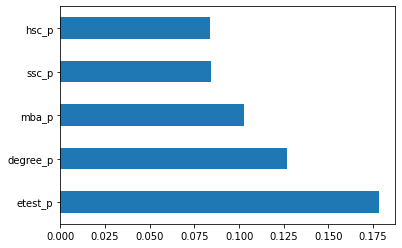

In [ ]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## **6 — Features selection Using Information Gain For Classification**

To understand this technique you need to have some statistical test knowledge like ANOVA test, t-test, chi-square test, p-value test.

**Mutual Information**


MI Estimate mutual information for a discrete target variable.
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

In short
A quantity called mutual information measures the amount of information one can obtain from one random variable given another.
The mutual information between two random variables X and Y can be stated formally as follows:
I(X; Y) = H(X) — H(X | Y) Where I(X; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has units of bits.

**Import dataset**


In [ ]:
import pandas as pd
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Checking how much unique values we have**


In [ ]:
df['Wine'].unique()

array([1, 2, 3])

**Check the datatype of features**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


**Train test split**


In [ ]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

**X_train.head**

In [ ]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


Note- Remove all the null values from the train and test dataset before applying mutual_info_classify.

A high value for any feature means that a particular feature is the best feature.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.42098176, 0.30039584, 0.17516609, 0.26843333, 0.19528061,
       0.48260015, 0.71462948, 0.1175939 , 0.27529979, 0.61606739,
       0.56116403, 0.54666629, 0.53016593])

Converting the information of features into series


In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.714629
Color.int               0.616067
Hue                     0.561164
OD                      0.546666
Proline                 0.530166
Phenols                 0.482600
Alcohol                 0.420982
Malic.acid              0.300396
Proanth                 0.275300
Acl                     0.268433
Mg                      0.195281
Ash                     0.175166
Nonflavanoid.phenols    0.117594
dtype: float64

Let’s plot the ordered mutual_info values per feature


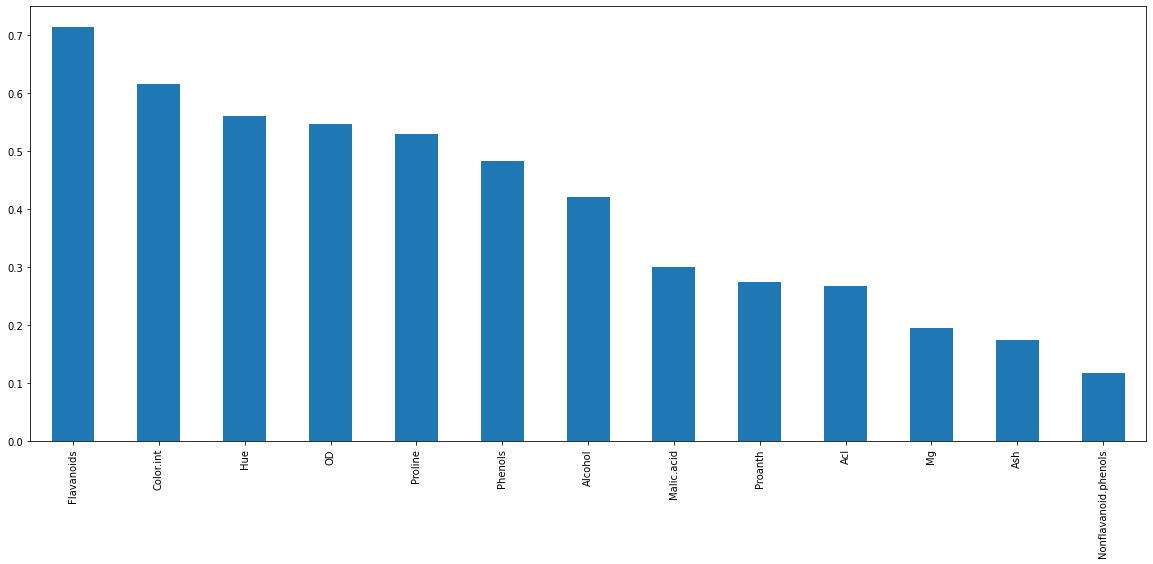

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


Import selectkbest function to pick top features


In [ ]:
from sklearn.feature_selection import SelectKBest

We will take only the top 5 features as our independent features

In [ ]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

## **7 — Features selection Using Information Gain For Regression**

**Mutual Information**


Estimate mutual information for a continuous target variable.
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances
Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

In short
A quantity called mutual information measures the amount of information one can obtain from one random variable given another.
The mutual information between two random variables X and Y can be stated formally as follows:
I(X; Y) = H(X) — H(X | Y) Where I(X; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has units of bits.
Here we are trying to find out the best features based on the specific sales price. And ales price is a continuous target variable.

In [ ]:
import pandas as pd
housing_df=pd.read_csv('/content/drive/MyDrive/Datasets/house prince_train.csv')

In [ ]:
housing_df.head()

In [ ]:
housing_df.info()

Check null values


In [ ]:
housing_df.isnull().sum()

**Taking only numerical variables to apply mutual information**

In [ ]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

We have to find out mutual information with respect to each and every feature along with sales price

Numericals Columns


In [ ]:
numerical_cols

Creating a data frame for all the numerical_cols

In [ ]:
housing_df=housing_df[numerical_cols]

In [ ]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Remove ID column


In [ ]:
housing_df=housing_df.drop("Id",axis=1)


In [ ]:
#Train and Test Split
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [ ]:
X_train

Check null values


In [ ]:
X_train.isnull().sum()

Applying mutual_info_regressionand filling null values with zero

The higher the value you get for any feature, the better it is and more dependent on to target feature.

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.2491294 , 0.21069317, 0.16694223, 0.53286437, 0.09848452,
       0.34950411, 0.25422466, 0.10522903, 0.16412815, 0.00825104,
       0.11565111, 0.38312062, 0.31260064, 0.22296479, 0.        ,
       0.48319691, 0.03544364, 0.        , 0.26410915, 0.08236791,
       0.04441535, 0.01748042, 0.18046341, 0.18192815, 0.27065734,
       0.39004003, 0.3682535 , 0.07795326, 0.16963796, 0.01877224,
       0.00187608, 0.01619159, 0.        , 0.        , 0.        ,
       0.00592684])

Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. As the value near to one the more dependent that particular feature is.

Converting all the values into series


In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.532864
GrLivArea        0.483197
GarageCars       0.390040
TotalBsmtSF      0.383121
GarageArea       0.368253
YearBuilt        0.349504
1stFlrSF         0.312601
GarageYrBlt      0.270657
FullBath         0.264109
YearRemodAdd     0.254225
MSSubClass       0.249129
2ndFlrSF         0.222965
LotFrontage      0.210693
Fireplaces       0.181928
TotRmsAbvGrd     0.180463
OpenPorchSF      0.169638
LotArea          0.166942
BsmtFinSF1       0.164128
BsmtUnfSF        0.115651
MasVnrArea       0.105229
OverallCond      0.098485
HalfBath         0.082368
WoodDeckSF       0.077953
BedroomAbvGr     0.044415
BsmtFullBath     0.035444
EnclosedPorch    0.018772
KitchenAbvGr     0.017480
ScreenPorch      0.016192
BsmtFinSF2       0.008251
YrSold           0.005927
3SsnPorch        0.001876
LowQualFinSF     0.000000
MoSold           0.000000
PoolArea         0.000000
MiscVal          0.000000
BsmtHalfBath     0.000000
dtype: float64

Plot the bar graph for mutual info


In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

Import SelectPercentile to choose top columns


In [ ]:
from sklearn.feature_selection import SelectPercentile

We will choose only top percentile features. SelectPercentile helps us to choose the top feature out of all the features.

In [ ]:
#Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)


SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7efbc5d40b00>)

Here, false means that a particular feature is not belonging to the top 20 percentile.

In [ ]:
selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

Getting top most important feature


In [ ]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

## **8 — Feature Selection Using Chi2 Statistical Analysis**

**Fisher Score- Chisquare Test For Feature Selection**

Compute chi-squared stats between each non-negative feature and class.
This score should be used to evaluate categorical variables in a classification task. This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.
Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi-Square statistic is commonly used for testing relationships between categorical variables.
It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

**Import Dataset-**


In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
import numpy as np

Top 10 columns


In [ ]:
df.head(10)

Information

In [ ]:
df.info()

So, I am considering categorical features and will try to find out the top important features. Creating a data frame for categorical features. We need to compare all the categories with the output category (Survived).

In [ ]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


Let’s perform label encoding on the embarked


In [ ]:
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [ ]:
#Let’s perform label encoding on the embarked


In [ ]:
import numpy as np
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

In [ ]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [ ]:
#Performing label encoding on alone
## let's perform label encoding on alone
df['alone']=np.where(df['alone']==True,1,0)

In [ ]:
df.head()

Train Test split


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

Check unique values for the sex column


In [ ]:
X_train['sex'].unique()

array([1, 0])

Check null values


In [ ]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

**Perform chi2 test**


In [ ]:
# Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)


Chi2 gives us two values-
F-score — fscore needs to be higher, the more the value of fscore the more important feature is
P-value — lesser the pvalue the more important the feature is
1st array values are of fscore
2nd array values are of pvalue

In [ ]:
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

Make a series of these p_values


In [ ]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

Sort the series in ascending order


In [ ]:
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

Observation
Sex Column is the most important column when compared to the output feature Survived.

## **9-Feature Selection Using Random Forest**



Tree-based machine learning algorithms like DecisionTreeClassifier or their ensemble learning equivalent RandomForestClassifier uses a set of trees which contains nodes resulting from splitting. The main aim of those splits is to decrease impurity as much as possible by using impurity measures like entropy and gini index. Those tree-based models can calculate how much important a feature is by calculating the amount of impurity decrease this feature will lead to

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

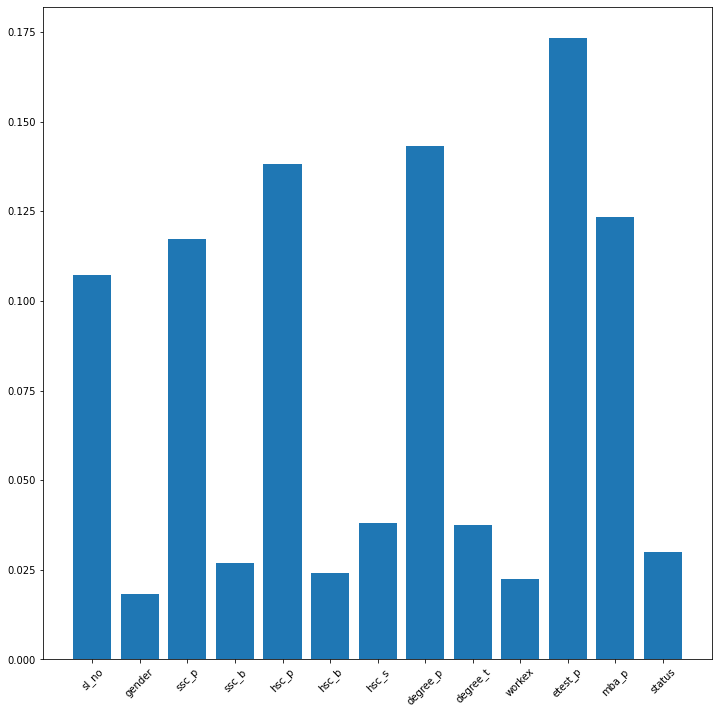

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
# create a figure to plot a bar, where x axis is features, and Y indicating the importance of each feature
plt.figure(figsize=(12,12))
plt.bar(X_train.columns, clf.feature_importances_)
plt.xticks(rotation=45)

The above histogram shows the importance of each feature. In our case, Thallium and number of vessels fluro are the most important features, but most of them have importance, and since that's the case, it's pretty much worth feeding these features to our machine learning model.

Now that you have selected the best features, you can easily use any sklearn classifier model and feed X_new array and see if it impacts accuracy of the full features model.

## **10-Feature Selection Using Recursive Feature Elimination (RFE)**



From sklearn Documentation: The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. We will be using sklearn.feature_selection module to import RFE class as well. RFE requires two hyperparameters:

n_features_to_select: the number of features we want to select.
estimator: Which type of machine learning model will be used for the prediction in every iteration while recursively searching for the appropriate set of features.

In [ ]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
X_new = rfe.fit_transform(X_train, y_train)
X_new

## 11- **Feature Importance through DT** [4,5]

We used Graphviz to describe the tree’s decision rules to determine potential customer churns. It is by far the simplest tool to visualize tree models.

![](https://drive.google.com/uc?export=view&id=1Ck-rycoImMhHO4yQVnDhhLymxHcY45iS)

Notice how the shade of the nodes gets darker as the Gini decreases. Lighter shade nodes have higher Gini impurity than the darker ones. Also, the class labels have different colors. Here, Blue refers to ‘Not Churn’ where Orange refers to customer ‘Churn’.

**Tree Visualization**


Although Graphviz is quite convenient, there is also a tool called dtreeviz. It’s a python library for decision tree visualization and model interpretation. dtreeviz currently supports popular frameworks like scikit-learn, XGBoost, Spark MLlib, and LightGBM.

First, we need to install dtreeviz. This can be done both via conda or pip. A detailed instructions on the installation can be found here.

**Preprocessing**

In [ ]:
import numpy as np, pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Student field Recommendation /Placement_Data_Full_Class.csv',header=0)

In [ ]:
df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# Creating a list of Object data type columns
obj_cols = df.select_dtypes(np.object).columns.tolist()
# Checking the categorical values in the Object columns
def check_value_counts(col_list):
  for col in col_list:
    print('-----------------------------')
    print(round((df[col].value_counts()/df.shape[0])*100,2))
    print('-----------------------------')

check_value_counts(obj_cols)

In [ ]:
# Importing LabelEncoder
df.select_dtypes(include=['object']).columns

In [ ]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['ssc_b'] = df['ssc_b'].fillna(df['ssc_b'].mode()[0])
df['hsc_b'] = df['hsc_b'].fillna(df['hsc_b'].mode()[0])
df['hsc_s'] = df['hsc_s'].fillna(df['hsc_s'].mode()[0])
df['degree_t'] = df['degree_t'].fillna(df['degree_t'].mode()[0])
df['workex'] = df['workex'].fillna(df['workex'].mode()[0])
df['specialisation'] = df['specialisation'].fillna(df['specialisation'].mode()[0])
df['status'] = df['status'].fillna(df['status'].mode()[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [ ]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df['salary'].fillna(df['salary'].mode()[0], inplace=True)


In [ ]:
# Putting feature variable to X
X = df.drop('specialisation',axis=1)

# Putting response variable to y
y = df['specialisation']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((150, 14), (65, 14))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=3,random_state=43)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=43, splitter='best')

In [ ]:
!pip install six


Although Graphviz is quite convenient, there is also a tool called dtreeviz. It’s a python library for decision tree visualization and model interpretation. dtreeviz currently supports popular frameworks like scikit-learn, XGBoost, Spark MLlib, and LightGBM.

First, we need to install dtreeviz. This can be done both via conda or pip. A detailed instructions on the installation can be found here.

Next, let’s import dtreeviz to the jypyter notebook.


In [ ]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

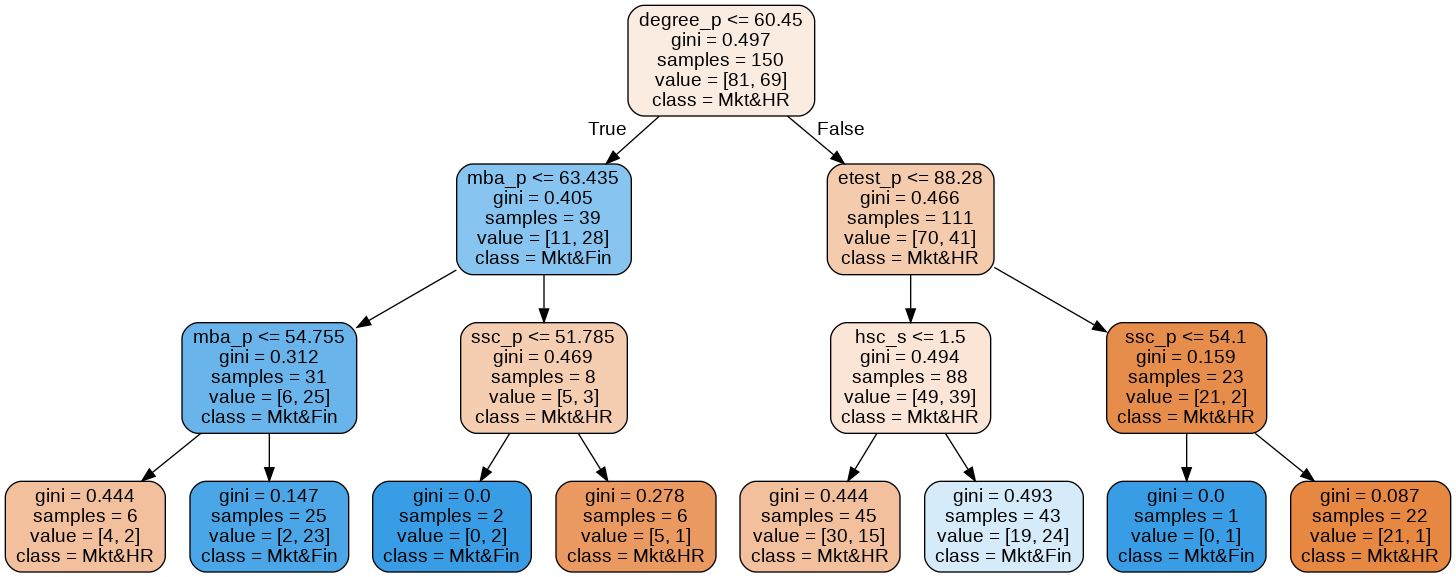

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Mkt&HR', "Mkt&Fin"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
!pip install dtreeviz


We have built a decision tree with max_depth3 levels for easier interpretation.

In [ ]:
import dtreeviz.trees
from sklearn.tree import DecisionTreeClassifier 


In [ ]:
dt_viz = DecisionTreeClassifier(max_depth=3,random_state=43)
dt_viz.fit(X_train, y_train)
tree_viz1 = dtreeviz.trees.dtreeviz(dt_viz, X_train,y_train, target_name='specialisation', feature_names= X_train.columns,class_names=['Mkt&HR','Mkt&Fin'])

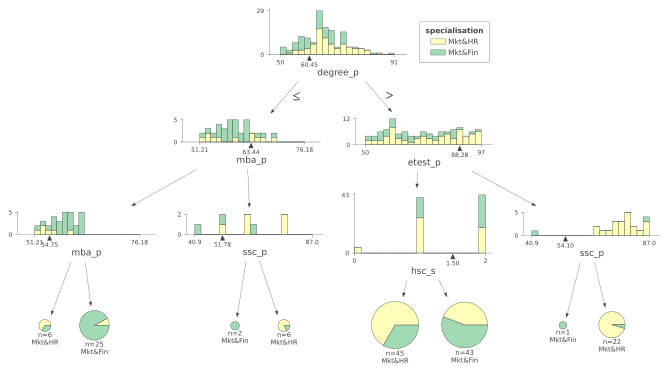

In [ ]:
tree_viz1

In [ ]:
tree_viz = dtreeviz.trees.dtreeviz(dt_viz, X_train,y_train, target_name="specialisation", feature_names= X_train.columns,class_names=['Mkt&HR','Mkt&Fin'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


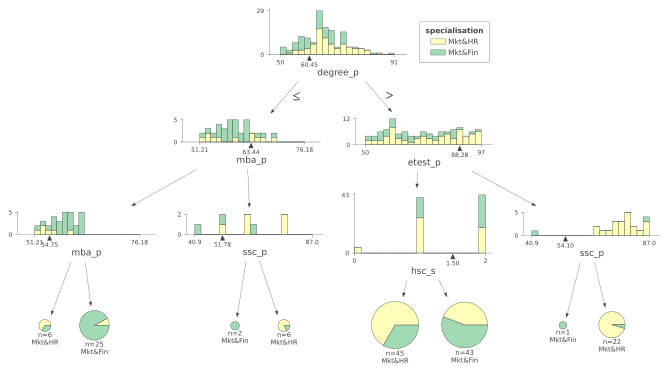

In [ ]:
tree_viz

Yay! dtreeviz plots the tree model with intuitive set of plots based on the features. It make easier to understand how decision tree decided to split the samples using the significant features. From the above plot we can clearly see that, the nodes to the left have class majorly who have not churned and to the right most of the samples belong to churn.
We can even highlight the prediction path if we want to quickly check how tree is deciding a particular class. For this to accomplish we need to pass an argument that gives feature values of the observation and highlights features which are used by tree to traverse path. However, more details on prediction path can be found here .

**Feature Importance**


Feature importance refers to technique that assigns a score to features based on how significant they are at predicting a target variable. The scores are calculated on the weighted Gini indices. Easy way to obtain the scores is by using the feature_importances_ attribute from the trained tree model. To know more about implementation in sci-kit please refer a illustrative blog post here.
Let’s see which features in the dataset are most important in term of predicting whether a customer would Churn or not.

In [ ]:
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, dt_viz.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [ ]:
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

In [ ]:
feat_df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
plt.show()

We have built a decision tree with max_depth3 levels for easier interpretation.

Feature importance refers to technique that assigns a score to features based on how significant they are at predicting a target variable. The scores are calculated on the weighted Gini indices. Easy way to obtain the scores is by using the feature_importances_ attribute from the trained tree model. To know more about implementation in sci-kit please refer a illustrative blog post here.

Let’s see which features in the dataset are most important in term of predicting whether a customer would Churn or not.

## **Genetic-opt**[6]

In [ ]:
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

data = load_iris()
X, y = data["data"], data["target"]

# Add random non-important features
noise = np.random.uniform(0, 10, size=(X.shape[0], 5))
X = np.hstack((X, noise))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

clf = SVC(gamma='auto')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    scoring="accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1)

# Train and select the features
evolved_estimator.fit(X_train, y_train)

# Features selected by the algorithm
features = evolved_estimator.best_features_
print(features)

# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test[:, features])
print(accuracy_score(y_test, y_predict_ga))

##  **12-Univariate feature selection**

Univariate feature selection works by selecting the best features based on univariate statistical tests **[8]**Univariate Feature Selection or Testing applies statistical tests to find relationships between the output variable and each input variable in isolation. Tests are conducted one input variable at a time. The tests depends whether you are running a regression task or a classification task.
An example output of these tests are tables showing relationships scores between each input variable and the output. (*see image below)[9]

Regression Task
In a regression task, you may be provided with an f-score and a p-value for each variable and gives you a view of the statistical significance of their relationships between the input and the output variables. This will help you assess how confident you should be with the variables you have used in your model [9]

In [ ]:
# import packages
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_regression

# import data
my_df = pd.read_csv("feature_selection_sample_data.csv")

X = my_df.drop(["output"], axis = 1)
y = my_df["output"]

feature_selector = SelectKBest(f_regression, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "f_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]

**Classification Task**

Depending on what test you use, you might be provided a chi-square score and a p-value for each variable. Again, this gives you a view of the statistical significance of their relationships between the input variables and the output variables [9]

In either Regression or Classification tasks, this will give you a basic information around which variables may be more important than the others and you could also put a threshold for the statistical test scores, the p-value or both to say that you only want to include variables that appear to have a reliable relationship with the output variable that you are looking to predict.

In [ ]:
 import packages
import pandas as pd

# import data
my_df = pd.read_csv("feature_selection_sample_data.csv")

from sklearn.feature_selection import SelectKBest, chi2

X = my_df.drop(["output"], axis = 1)
y = my_df["output"]

feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]

**Example**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import GenericUnivariateSelect, chi2


In [ ]:
X, y = load_breast_cancer(return_X_y=True)

In [ ]:
X.shape

(569, 30)

In [ ]:
transformer = GenericUnivariateSelect(chi2, mode='k_best', param=20)

In [ ]:
X_new = transformer.fit_transform(X, y)

In [ ]:
X_new.shape


## **13- SelectPercentile**

Select features according to a percentile of the highest scores [8]



In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)

In [ ]:
X.shape

(1797, 64)

In [ ]:
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)

In [ ]:
X_new.shape

(1797, 7)

## 14-**SelectKBest**

[8]

In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)

In [ ]:
X.shape

(1797, 64)

In [ ]:
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)

In [ ]:
X_new.shape

(1797, 20)

## 14- **SelectFpr**

Select the pvalues below alpha based on a FPR test.FPR test stands for False Positive Rate test. It controls the total amount of false detections **[8]**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFpr, chi2
X, y = load_breast_cancer(return_X_y=True)
X.shape


(569, 30)

In [ ]:
X_new = SelectFpr(chi2, alpha=0.01).fit_transform(X, y)
X_new.shape

(569, 16)

## **15-Correlation Matrix**

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.
A correlation matrix consists of rows and columns that show the variables. Each cell in a table contains the correlation coefficient [9]

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data
my_df = pd.read_csv("feature_selection_sample_data.csv")

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = my_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## **16-Recursive Feature Elimination with Cross-Validation (RFECV)**

Recursive Feature Elimination fits a model that starts with all the input variables, then iteratively removes those with the weakest relationship with the output until the desired number of features is reached. It actually fits a model instead of just running statistical tests unlike the Univariate Testing [9]

“RFE is popular because it is easy to configure and use and because it is effective at selecting those features in a training dataset that are more or most relevant in predicting the target variable.” [9]

The CV in RFECV means Cross-Validation. It gives you a better understanding on what the variables will be included in your model.
In the Cross-Validation part, it splits the data into different chunks and iteratively trains and validates models on each chunks separately. This simply means that each time you assess different models with certain variables included or eliminated, the algorithm also knows how accurate each model was from the model scenarios that are created and can determine which provided the best accuracy and concludes the best set of input variables to use [9]

In [ ]:
# import packages
import pandas as pd

# import data
my_df = pd.read_csv("feature_selection_sample_data.csv")

from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = my_df.drop(["output"], axis = 1)
y = my_df["output"]

regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X,y)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal numer of features: {optimal_feature_count}")

X_new = X.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_, marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.grid_scores_), 4)})")
plt.tight_layout() 
plt.show()

# **References**

[1-Feature Selection Techniques](https://medium.com/geekculture/feature-selection-techniques-bc0c69e85b85)

[2-Feature Importance — Everything you need to know
](https://medium.com/swlh/feature-importance-hows-and-why-s-3678ede1e58f)

[3-Feature Selection using Scikit-Learn in Python](https://www.thepythoncode.com/article/feature-selection-and-feature-engineering-using-python?utm_source=newsletter&utm_medium=email&utm_campaign=newsletter)

[4-Feature Importance and Visualization of Tree Models](https://medium.com/chinmaygaikwad/feature-importance-and-visualization-of-tree-models-d491e8198b0a)

[5-chinmaygaikwad12-telco-churn-prediction](https://jovian.ai/chinmaygaikwad12/telco-churn-prediction/v/3?utm_source=embed#C68)

[6-rodrigo-arenasSklearn-genetic-opt](https://github.com/rodrigo-arenas/Sklearn-genetic-opt)

[7-Machine Learning Process Tutorial](https://medium.com/swlh/machine-learning-process-tutorial-222327f53efb)

[8-Base classes and utility functions](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)

[9-Feature Selection in Machine Learning: Correlation Matrix | Univariate Testing | RFECV](https://medium.com/geekculture/feature-selection-in-machine-learning-correlation-matrix-univariate-testing-rfecv-1186168fac12)

[Combining Feature Selection Methods](https://medium.com/@vatvenger/combining-feature-selection-methods-cdb4ae5be979)
